## **NYC TLC TRIP**

**Objective**

The goal of this project is to conduct a comprehensive analysis of the NYC Taxi and Limousine Commission (TLC) trip data. The analysis encompasses data cleaning, handling missing values, identifying outliers, and exploring the distribution of key variables. The visualization aspects of the project aim to provide valuable insights for the marketing team, particularly focusing on Average Passenger Count Over Months, Weekday vs. Weekend Analysis, and Payment Type Distribution Over Months.

**Data Cleaning**
In the initial phase, thorough data cleaning is performed to ensure data integrity and consistency. This involves addressing any anomalies in the dataset, converting data types, and handling missing values. The datetime columns are converted to the appropriate format, and additional features such as pickup hour, day, and month are derived for further analysis.

**Preprocessing**
After data cleaning, the preprocessing stage involves additional steps to prepare the dataset for analysis. This includes further feature engineering, handling missing values through imputation techniques, and addressing outliers using statistical methods. The dataset is refined and made suitable for subsequent analysis.

**Outlier Detection**
Outliers, if present, are identified using statistical methods. Addressing outliers is crucial for obtaining accurate insights, and the chosen approach is explained to maintain data integrity.

**Distribution Analysis**
The distribution analysis involves exploring the nature of the data, conducting normality tests, and performing specific analyses related to key metrics. Several targeted analyses are undertaken, focusing on:

Average Trip Distance Over Cohorts:
The distribution of average trip distance over different cohorts is examined.
A detailed analysis is conducted to understand how trip distance varies across different periods.

Average Passenger Count Over Cohorts:
The distribution of average passenger count over cohorts is explored.
Insights are derived to understand passenger count patterns across various cohorts.

Weekday vs. Weekend Analysis:
The distribution of trip counts or distances is analyzed to discern patterns between weekdays and weekends.
Visualizations highlight variations in trip characteristics on weekdays compared to weekends.

Payment Type Distribution Over Cohorts:
The distribution of payment types over cohorts is examined.
Specific insights are drawn regarding the popularity of different payment methods over time.
Normality tests are conducted to assess if the data follows a normal distribution. Visualization tools, including histograms and density plots, are employed to provide a clear understanding of the data distribution for each analysis.

## **Columns Description**
**VendorID** : A code indicating the LPEP provider that provided the record.
1 = Creative Mobile Technologies, LLC.
2 = VeriFone Inc.

**lpep_pickup_datetime**: The date and time when the meter was engaged.

**lpep_dropoff_datetime**: The date and time when the meter was disengaged.

**Passenger_count**: The number of passengers in the vehicle. This is a driver-entered value.

**Trip_distance**: The elapsed trip distance in miles was reported by the taximeter.

**PULocationID**: TLC Taxi Zone in which the taximeter was engaged.

**DOLocationID**: TLC Taxi Zone in which the taximeter was disengaged.

**RateCodeID**: The final rate code is in effect at the end of the trip.
1 = Standard rate
2 = JFK
3 = Newark
4 = Nassau or Westchester
5 = Negotiated fare
6 = Group ride

**Store_and_fwd_flag**: This flag indicates whether the trip record was held in the vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.
Y = store and forward trip
N = not a store and forward trip

**Payment_type**: A numeric code signifying how the passenger paid for the trip.
1 = Credit card
2 = Cash
3 = No charge
4 = Dispute
5 = Unknown
6 = Voided trip

**Fare_amount**: The time-and-distance fare is calculated by the meter. Extra Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight charges.

**MTA_tax**: $0.50 MTA tax that is automatically triggered based on the metered rate in use. 

**Improvement_surcharge**: $0.30 improvement surcharge assessed on hailed trips at the flag drop. The improvement surcharge began being levied in 2015.

**Tip_amount**: This field is automatically populated for credit card tips. Cash tips are not included.

**Tolls_amount**: The total amount of all tolls paid in the trip.

**Total_amount**:The total amount charged to passengers. Does not include cash tips.

**Trip_type**: A code indicating whether the trip was a street hail or a dispatch that is automatically assigned based on the metered rate in use but can be altered by the driver.
1 = Street-hail
2 = Dispatch

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## **Data Cleaning**

1. Load Libraries
2. Display Dataset
3. Drop Column that are no longer needed to be analysed
4. Check Missing Values

In [3]:
# Load the dataset
df = pd.read_csv('NYC TLC Trip Record.csv')

# Display the dataset
df.info()

<ipython-input-3-7582f18432f4>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NYC TLC Trip Record.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [4]:
# Drop unnecessary columns (replace with the actual column names)
columns_to_drop = ['ehail_fee','store_and_fwd_flag','PULocationID','DOLocationID','improvement_surcharge','congestion_surcharge']
df = df.drop(columns=columns_to_drop, axis=1)

In [5]:
# Check for missing values
df.isnull().sum()

VendorID                    0
lpep_pickup_datetime        0
lpep_dropoff_datetime       0
RatecodeID               4324
passenger_count          4324
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
total_amount                0
payment_type             4324
trip_type                4334
dtype: int64

In [6]:
# Display the information of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   RatecodeID             63887 non-null  float64
 4   passenger_count        63887 non-null  float64
 5   trip_distance          68211 non-null  float64
 6   fare_amount            68211 non-null  float64
 7   extra                  68211 non-null  float64
 8   mta_tax                68211 non-null  float64
 9   tip_amount             68211 non-null  float64
 10  tolls_amount           68211 non-null  float64
 11  total_amount           68211 non-null  float64
 12  payment_type           63887 non-null  float64
 13  trip_type              63877 non-null  float64
dtypes: float64(11), int64(1), object(2)
memory usage: 7.3+

## **Preprocessing**

**RateCodeID**

In [7]:
# check with skew of RateCodeID
df['RatecodeID'].skew()

# check with kurtosis of RateCodeID
df['RatecodeID'].kurtosis()

4043.280307351173

<Axes: xlabel='RatecodeID', ylabel='Count'>

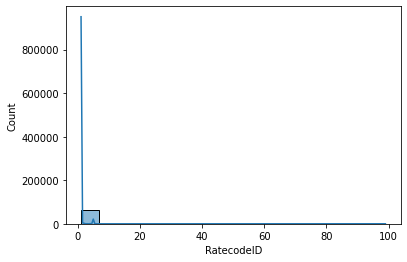

In [8]:
# check with histogram of RateCodeID
sns.histplot(data=df, x='RatecodeID', kde=True)

**Passenger_Count**

In [9]:
# check with skew of passenger_count
df['passenger_count'].skew()

# check with kurtosis
df['passenger_count'].kurtosis()

11.963156559599348

<Axes: xlabel='passenger_count', ylabel='Count'>

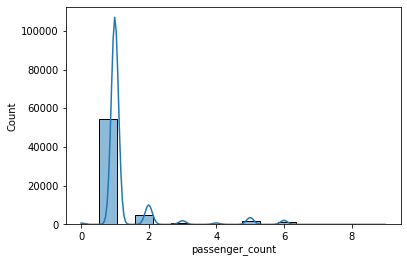

In [10]:
# check with histogram 
sns.histplot(data=df, x='passenger_count', kde=True)

**Payment_Type**

In [11]:
# check with skew of payment_type
df['payment_type'].skew()

# check with kurtosis
df['payment_type'].kurtosis()

-0.07561706275629154

<Axes: xlabel='payment_type', ylabel='Count'>

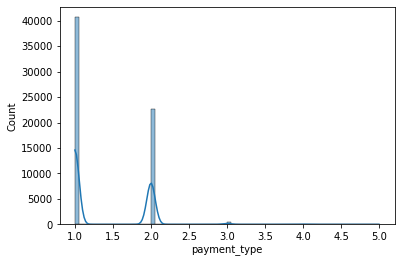

In [12]:
# check with histogram 
sns.histplot(data=df, x='payment_type', kde=True)

**Trip_type**

In [13]:
# Check with skew of trip_type
df['trip_type'].skew()

# Check with kurtosis
df['trip_type'].kurtosis()

40.61955951161304

<Axes: xlabel='trip_type', ylabel='Count'>

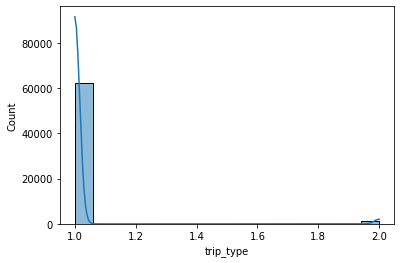

In [14]:
# Check with histogram 
sns.histplot(data=df, x='trip_type', kde=True)

Kurtosis = 3 --> Normally distributed
kurtosis < 3 --> Not normal and platykurtic; kurtosis > 3 --> Not normal and leptokurtic

Skew = 0 --> Normally distributed
skew > 0 --> Not normal and right-skewed; skew < 0 --> Not normal and left-skewed

## **Handling Missing Values**

In [15]:
#Histogram data RateCodeID --> It can be seen that it is not normally distributed, so using the median.
df['RatecodeID'].fillna(df['RatecodeID'].median(), inplace=True)

In [16]:
#Histogram data RateCodeID --> It can be seen that it is not normally distributed, so using the median.
df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)

In [17]:
#Histogram data RateCodeID --> It can be seen that it is not normally distributed, so using the median.
df['payment_type'].fillna(df['payment_type'].median(), inplace=True)

In [18]:
#Histogram data RateCodeID --> It can be seen that it is not normally distributed, so using the median.
df['trip_type'].fillna(df['trip_type'].median(), inplace=True)

## **convert datatypes**

In [19]:
# Convert 'lpep_pickup_datetime' and 'lpep_dropoff_datetime' columns to datetime type
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

# Convert 'payment_type' column to integer (assuming it contains only integer values)
df['RatecodeID'] = df['RatecodeID'].astype(int)
df['passenger_count'] = df['passenger_count'].astype(int)
df['trip_distance'] = df['trip_distance'].astype(int)
df['fare_amount'] = df['fare_amount'].astype(int)
df['mta_tax'] = df['mta_tax'].astype(int)
df['extra'] = df['extra'].astype(int)
df['tip_amount'] = df['tip_amount'].astype(int)
df['tolls_amount'] = df['tolls_amount'].astype(int)
df['total_amount'] = df['total_amount'].astype(int)
df['payment_type'] = df['payment_type'].astype(int)
df['trip_type'] = df['trip_type'].astype(int)

# Display DataFrame
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,payment_type,trip_type
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,1,1,2,14,1,0,4,0,24,1,1
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,1,1,1,10,1,0,2,0,15,1,1
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,1,1,0,7,1,0,1,0,11,1,1
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,1,1,1,6,0,1,1,0,10,1,1
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,1,1,1,6,0,1,0,0,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,1,1,4070,15,0,0,0,0,16,1,1
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,1,1,2,4,0,0,0,0,5,1,1
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,1,1,3,16,0,0,3,0,21,1,1
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,1,1,3,14,0,0,3,0,19,1,1


In [20]:
# Create new columns for date and time
df['pickup_date'] = df['lpep_pickup_datetime'].dt.date
df['pickup_time'] = df['lpep_pickup_datetime'].dt.time

df['dropoff_date'] = df['lpep_dropoff_datetime'].dt.date
df['dropoff_time'] = df['lpep_dropoff_datetime'].dt.time

df = df.drop(['lpep_pickup_datetime', 'lpep_dropoff_datetime'], axis=1)

# Display the updated DataFrame
df.head()

,VendorID,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,payment_type,trip_type,pickup_date,pickup_time,dropoff_date,dropoff_time
0,2,1,1,2,14,1,0,4,0,24,1,1,2023-01-01,00:26:10,2023-01-01,00:37:11
1,2,1,1,1,10,1,0,2,0,15,1,1,2023-01-01,00:51:03,2023-01-01,00:57:49
2,2,1,1,0,7,1,0,1,0,11,1,1,2023-01-01,00:35:12,2023-01-01,00:41:32
3,1,1,1,1,6,0,1,1,0,10,1,1,2023-01-01,00:13:14,2023-01-01,00:19:03
4,1,1,1,1,6,0,1,0,0,8,1,1,2023-01-01,00:33:04,2023-01-01,00:39:02


In [21]:
# Print information about Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   VendorID         68211 non-null  int64 
 1   RatecodeID       68211 non-null  int64 
 2   passenger_count  68211 non-null  int64 
 3   trip_distance    68211 non-null  int64 
 4   fare_amount      68211 non-null  int64 
 5   extra            68211 non-null  int64 
 6   mta_tax          68211 non-null  int64 
 7   tip_amount       68211 non-null  int64 
 8   tolls_amount     68211 non-null  int64 
 9   total_amount     68211 non-null  int64 
 10  payment_type     68211 non-null  int64 
 11  trip_type        68211 non-null  int64 
 12  pickup_date      68211 non-null  object
 13  pickup_time      68211 non-null  object
 14  dropoff_date     68211 non-null  object
 15  dropoff_time     68211 non-null  object
dtypes: int64(12), object(4)
memory usage: 8.3+ MB


## **Outliers Detection**

In the context of our **NYC TLC Trip** analysis, the identification of outliers using the Interquartile Range (IQR) method is crucial for understanding the distribution of key variables such as trip distance, passenger count, and payment types. The IQR method allows us to identify data points that deviate significantly from the central tendency and assess their potential impact on our analysis.

However, rather than immediately deleting these outliers, we opt to retain them for the following reasons:

Comprehensive Understanding: Outliers in our dataset may represent unique instances, special events, or anomalies that contribute to a more comprehensive understanding of the taxi trip data. These observations might hold valuable insights into specific scenarios or patterns that are important for our analysis.

Impact on Insights: Deleting outliers can distort the statistical measures and summary statistics, leading to an inaccurate representation of the data distribution. By retaining outliers, we acknowledge their presence and potential impact on our findings, ensuring that our insights are robust and reflective of the true nature of the data.

Data Integrity and Reproducibility: Transparency and reproducibility are essential in research and analysis. By not deleting outliers, we maintain the integrity of our dataset and allow for transparency in our methodology. Others can replicate our analysis and verify the robustness of our results.

This approach ensures that our analysis remains thorough, unbiased, and capable of capturing the complexity inherent in the **NYC TLC trip** data.

In [22]:
# Display the information of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   VendorID         68211 non-null  int64 
 1   RatecodeID       68211 non-null  int64 
 2   passenger_count  68211 non-null  int64 
 3   trip_distance    68211 non-null  int64 
 4   fare_amount      68211 non-null  int64 
 5   extra            68211 non-null  int64 
 6   mta_tax          68211 non-null  int64 
 7   tip_amount       68211 non-null  int64 
 8   tolls_amount     68211 non-null  int64 
 9   total_amount     68211 non-null  int64 
 10  payment_type     68211 non-null  int64 
 11  trip_type        68211 non-null  int64 
 12  pickup_date      68211 non-null  object
 13  pickup_time      68211 non-null  object
 14  dropoff_date     68211 non-null  object
 15  dropoff_time     68211 non-null  object
dtypes: int64(12), object(4)
memory usage: 8.3+ MB


In [23]:
# Create numeric columns to select data types only with integers
numeric_columns = df.select_dtypes(include=['int64']).columns

Number of outliers for VendorID: 9343
Percentage of lower bound outliers: 13.70%
Percentage of upper bound outliers: 0.00%


Number of outliers for RatecodeID: 1784
Percentage of lower bound outliers: 0.00%
Percentage of upper bound outliers: 2.62%
Number of outliers for passenger_count: 9588
Percentage of lower bound outliers: 0.49%
Percentage of upper bound outliers: 13.56%
Number of outliers for trip_distance: 4502
Percentage of lower bound outliers: 0.00%
Percentage of upper bound outliers: 6.60%
Number of outliers for fare_amount: 4643
Percentage of lower bound outliers: 0.05%
Percentage of upper bound outliers: 6.76%
Number of outliers for extra: 2012
Percentage of lower bound outliers: 0.07%
Percentage of upper bound outliers: 2.88%
Number of outliers for mta_tax: 9091
Percentage of lower bound outliers: 0.00%
Percentage of upper bound outliers: 13.33%
Number of outliers for tip_amount: 2385
Percentage of lower bound outliers: 0.00%
Percentage of upper bound outliers: 3.50%
Number of outliers for tolls_amount: 1741
Percentage of lower bound outliers: 0.00%
Percentage of upper bound outliers: 2.55%
Num

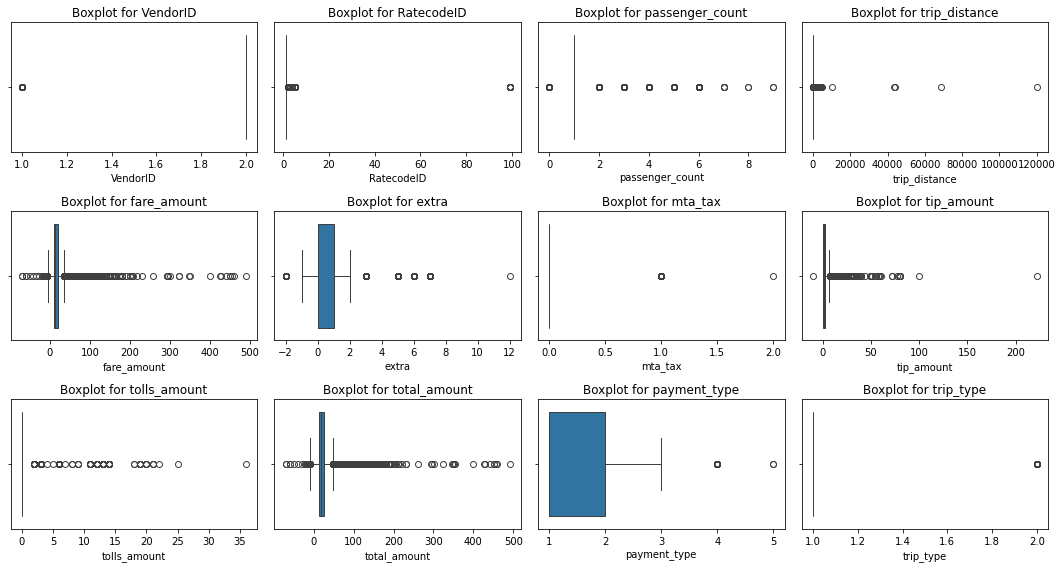

In [24]:
# Create box plots for each numerical column to identify outliers
plt.figure(figsize=(15, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')

    # Calculate the IQR for the column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers based on IQR
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)

    # Calculate the percentage of upper and lower bound outliers
    total_data_points = len(df[column])
    percentage_lower_bound_outliers = (outliers & (df[column] < lower_bound)).sum() / total_data_points * 100
    percentage_upper_bound_outliers = (outliers & (df[column] > upper_bound)).sum() / total_data_points * 100

    # Display the count and percentage of outliers for the column
    print(f"Number of outliers for {column}: {outliers.sum()}")
    print(f"Percentage of lower bound outliers: {percentage_lower_bound_outliers:.2f}%")
    print(f"Percentage of upper bound outliers: {percentage_upper_bound_outliers:.2f}%")

# Show the plot bar
plt.tight_layout()
plt.show()

## **Export Clean Datatype into CSV**

In [25]:
# Export Data that is already cleaned to be analysed in further visualization
df.to_csv('NYC_TLC_Trip_Record_Cleaned.csv', index=False)

## **Data Correlation**

In [26]:
# Using df.corr of Spearman method to find the correlation of data
df.corr(method='spearman',numeric_only=True)

,VendorID,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,payment_type,trip_type
VendorID,1.000000,0.035102,0.057501,0.068300,0.011301,-0.083440,-0.984316,0.070448,-0.018774,0.018076,0.002298,0.039352
RatecodeID,0.035102,1.000000,0.024039,-0.038052,0.117438,-0.104526,-0.049723,-0.021515,0.079945,0.081515,-0.017978,0.882794
passenger_count,0.057501,0.024039,1.000000,0.013424,0.005521,0.036516,-0.055543,0.009255,-0.009877,0.013072,0.019556,0.019018
trip_distance,0.068300,-0.038052,0.013424,1.000000,0.813066,0.061296,-0.065948,0.314858,0.192570,0.796382,-0.088496,-0.068703
fare_amount,0.011301,0.117438,0.005521,0.813066,1.000000,-0.025292,-0.013120,0.278010,0.232995,0.946479,-0.136009,0.085869
extra,-0.083440,-0.104526,0.036516,0.061296,-0.025292,1.000000,0.088545,0.099024,0.013006,0.122738,-0.027336,-0.102124
mta_tax,-0.984316,-0.049723,-0.055543,-0.065948,-0.013120,0.088545,1.000000,-0.069384,0.019108,-0.019523,-0.000348,-0.055569
tip_amount,0.070448,-0.021515,0.009255,0.314858,0.278010,0.099024,-0.069384,1.000000,0.090601,0.468839,-0.726291,-0.024635
tolls_amount,-0.018774,0.079945,-0.009877,0.192570,0.232995,0.013006,0.019108,0.090601,1.000000,0.248155,-0.053757,0.001574
total_amount,0.018076,0.081515,0.013072,0.796382,0.946479,0.122738,-0.019523,0.468839,0.248155,1.000000,-0.286851,0.049977


## **Correlation Matrix**

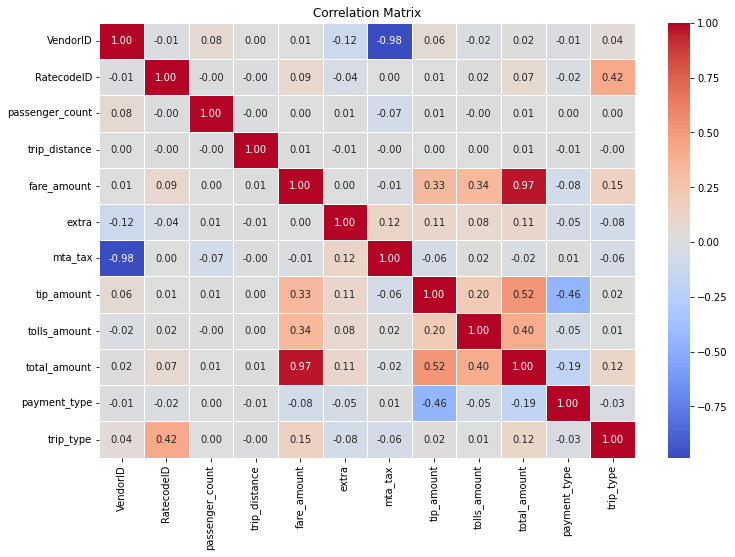

In [27]:
# Calculate the correlation matrix with numerical columns datatypes
correlation_matrix = df[numeric_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# To give title of this heatmap to be Correlation Matrix
plt.title('Correlation Matrix')

# To display the heatmap of correlation matrix
plt.show()

## **Visualization & Analysis**

## **Passenger Count Analysis**

<ipython-input-32-e2e17bd738d3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pickup_month', y='passenger_count', data=cohort_passenger_counts, palette='viridis')


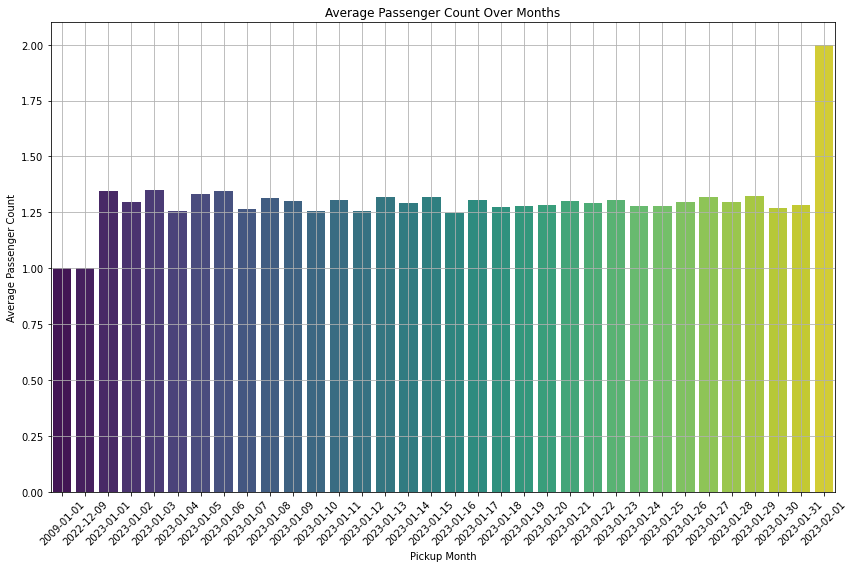

In [32]:
# 'pickup_date' is a datetime column
df['pickup_month'] = df['pickup_date']

# Group by cohorts and calculate average passenger count
cohort_passenger_counts = df.groupby('pickup_month')['passenger_count'].mean().reset_index()

# Plotting Distribution of Passenger Counts Over Cohorts using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='pickup_month', y='passenger_count', data=cohort_passenger_counts, palette='viridis')
plt.title('Average Passenger Count Over Months')
plt.xlabel('Pickup Month')
plt.ylabel('Average Passenger Count')
plt.xticks(rotation=45)
plt.grid(True)

# Show visualization
plt.tight_layout()
plt.show()


Passenger Count Analysis aims to understand how the distribution of passenger counts changes over different cohorts, where cohorts are defined based on pickup months. This analysis helps identify patterns or trends related to the number of passengers in taxi trips over time. 

The insight derived from the cohort analysis of passenger counts may include:

Temporal Patterns: Observing whether there are specific months or periods where the distribution of passenger counts shows noticeable changes.

Seasonal Trends: Identifying any recurring patterns or trends in passenger counts across different seasons or months.

Shifts in Usage: Understanding if there are shifts in the preferred number of passengers per trip over time.

Correlation with External Factors: Investigating whether there are correlations between passenger counts and external factors such as holidays, events, or changes in the city's activities.

Operational Considerations: Providing insights that can be valuable for operational decisions, such as optimizing fleet size or understanding demand fluctuations.

In summary, Passenger Count Analysis through cohort analysis helps reveal insights into the dynamics of passenger preferences and behaviors over time, facilitating data-driven decision-making in the context of taxi services.

## **Weekday vs. Weekend Analysis**

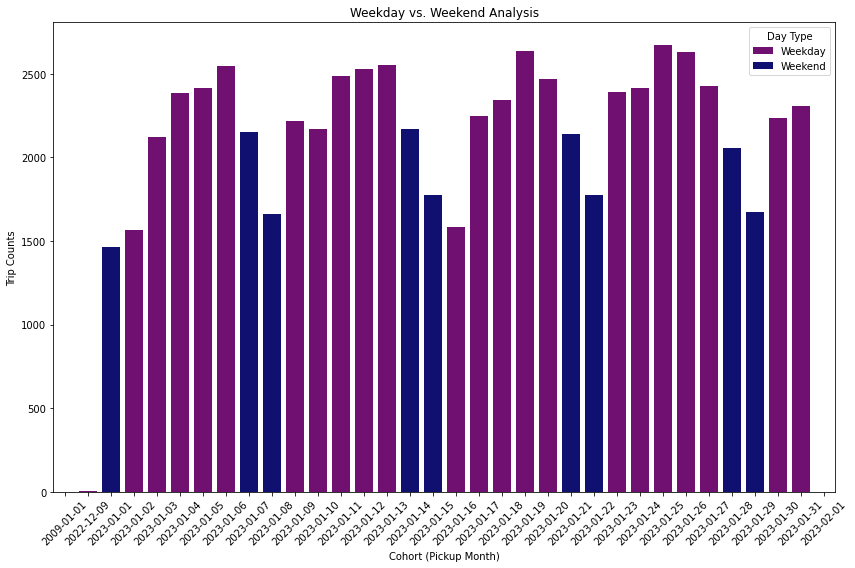

In [29]:
# Convert 'pickup_date' column to datetime
df['pickup_date'] = pd.to_datetime(df['pickup_date'])

# Create new columns for day of the week (0 = Monday, 6 = Sunday)
df['pickup_day_of_week'] = df['pickup_date'].dt.dayofweek

# Map day of the week to a categorical column (Weekday or Weekend)
df['day_type'] = df['pickup_day_of_week'].map({0: 'Weekday', 1: 'Weekday', 2: 'Weekday', 3: 'Weekday', 4: 'Weekday', 5: 'Weekend', 6: 'Weekend'})

# Create cohorts based on pickup months
df['pickup_month'] = df['pickup_date']

# Group by cohorts and day type, and calculate trip counts
cohort_day_type_counts = df.groupby(['pickup_month', 'day_type']).size().unstack().fillna(0)

# Plotting Weekday vs. Weekend Analysis as a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=cohort_day_type_counts.reset_index(), x='pickup_month', y='Weekday', color='purple', label='Weekday')
sns.barplot(data=cohort_day_type_counts.reset_index(), x='pickup_month', y='Weekend', color='navy', label='Weekend')
plt.title('Weekday vs. Weekend Analysis')
plt.xlabel('Cohort (Pickup Month)')
plt.ylabel('Trip Counts')
plt.xticks(rotation=45)
plt.legend(title='Day Type')

# Show visualization
plt.tight_layout()
plt.show()

Insight:
The bar plot visualizes the distribution of trip counts, distinguishing between weekdays and weekends. The purple bars represent weekday trip counts, while the yellow bars represent weekend trip counts. 

Observations from the analysis include:

Temporal Patterns: The analysis reveals temporal patterns in trip counts over the cohorts. Each cohort represents a specific pickup month, and the bar plot allows easy comparison between weekdays and weekends.

Variation Across Cohorts: The varying heights of bars across cohorts indicate fluctuations in trip counts. Identifying cohorts with noticeable changes helps in understanding the temporal dynamics of taxi service demand.

Weekday-Weekend Disparities: Comparing weekday and weekend bars provides insights into how weekdays and weekends contribute to overall trip counts. Significant disparities suggest that the service experiences differing demand patterns during weekdays and weekends.

Cohort-Specific Insights: Each cohort may exhibit unique patterns based on external factors such as holidays, events, or seasonal variations. Analyzing specific cohorts with exceptional patterns can provide deeper insights into the factors influencing trip counts.

Informing Operational Decisions: Understanding the temporal distribution of trip counts aids in making informed operational decisions, such as optimizing resource allocation, adjusting service levels, or planning promotional campaigns during peak demand periods.

Overall, this visualization enhances the comprehension of how taxi service demand varies over time, particularly in the context of weekdays and weekends across different cohorts.

## **Payment Type Distribution Over Months**

<Figure size 864x576 with 0 Axes>

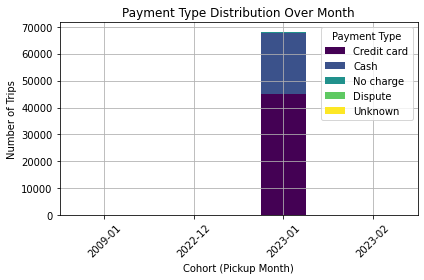

In [31]:
# Assuming 'pickup_date' is a datetime column
df['pickup_month'] = df['pickup_date'].dt.to_period('M')

# Group by cohorts and payment type, and calculate counts
cohort_payment_type_counts = df.groupby(['pickup_month', 'payment_type']).size().unstack().fillna(0)

# Map payment type numeric codes to labels
payment_type_labels = {
    1: 'Credit card',
    2: 'Cash',
    3: 'No charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided trip'
}

cohort_payment_type_counts.columns = [payment_type_labels.get(col, col) for col in cohort_payment_type_counts.columns]

# Plotting Payment Type Analysis using a stacked bar plot
plt.figure(figsize=(12, 8))
cohort_payment_type_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Payment Type Distribution Over Month')
plt.xlabel('Cohort (Pickup Month)')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.legend(title='Payment Type')
plt.grid(True)

# Show visualization
plt.tight_layout()
plt.show()

The provided analysis offers valuable insights into how the distribution of payment types has evolved across different cohorts over time. Here's a breakdown of the key observations:

Credit Card Dominance: Credit card payments consistently dominate across all cohorts. The stacked bar plot reveals that credit card usage is the most prevalent payment method.

Stability in Cash Payments: While credit card usage is prominent, there's a stable presence of cash payments. This indicates that a significant portion of passengers still prefers traditional cash transactions.

Negligible Instances of Disputes and Voided Trips: The columns representing 'Dispute' and 'Voided trip' are relatively small, suggesting that these situations are infrequent. This is a positive sign for the reliability and accuracy of transactions.

No Charge and Unknown Categories: 'No charge' and 'Unknown' categories show minimal changes across cohorts, suggesting that instances falling into these categories remain relatively constant over time.

Cohort-Specific Patterns: While credit card and cash payments exhibit consistent patterns, there might be cohort-specific variations in the 'No charge,' 'Dispute,' and 'Unknown' categories. Further investigation into these cohorts could uncover specific trends or anomalies.

Seasonal Trends: The analysis, conducted on a monthly basis, enables the identification of potential seasonal trends or shifts in payment preferences. Understanding these variations can be crucial for adapting business strategies.

Overall, this analysis provides a comprehensive view of how different payment types contribute to the overall transaction landscape. It can serve as a foundation for more in-depth investigations into specific cohorts or time periods, helping businesses tailor their services to evolving customer preferences.